# SEABORN

## Seaborn Distriboution Plot

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


/home/tn/pyvenv/DataScienceMLBootcamp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

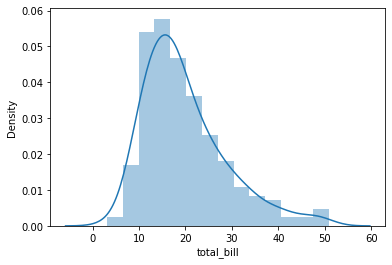

In [6]:
sns.distplot(tips['total_bill'])

/home/tn/pyvenv/DataScienceMLBootcamp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

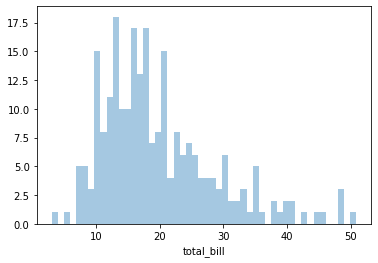

In [8]:
sns.distplot(tips['total_bill'], kde=False, bins=50)

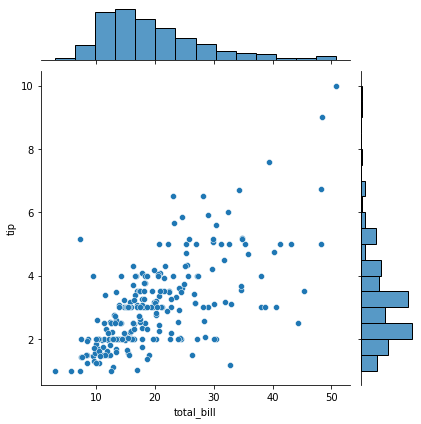

In [10]:
sns.jointplot(x='total_bill', y='tip', data=tips)

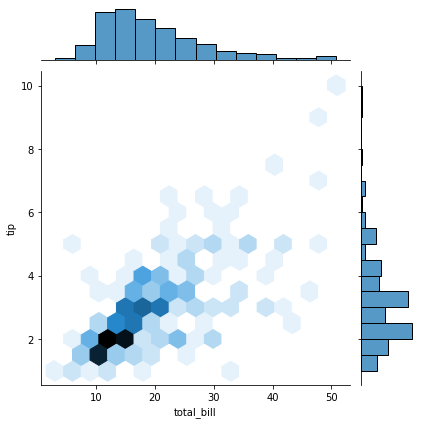

In [11]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

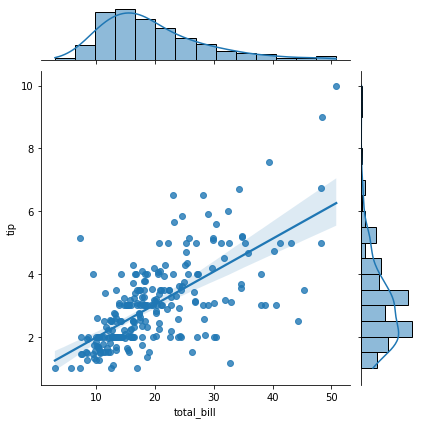

In [12]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

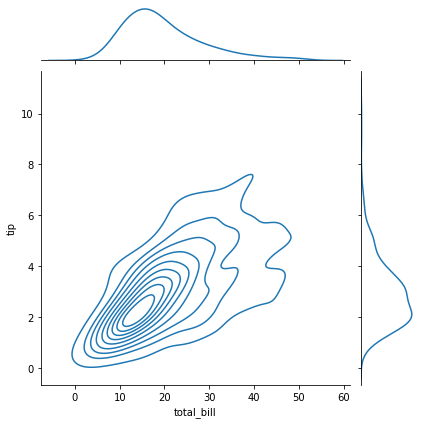

In [13]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

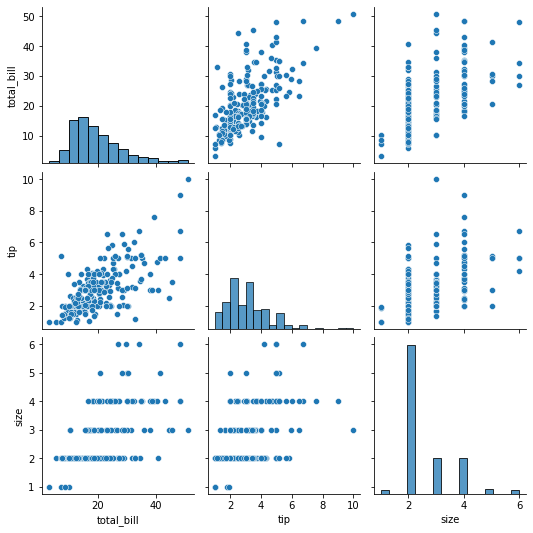

In [14]:
sns.pairplot(tips)

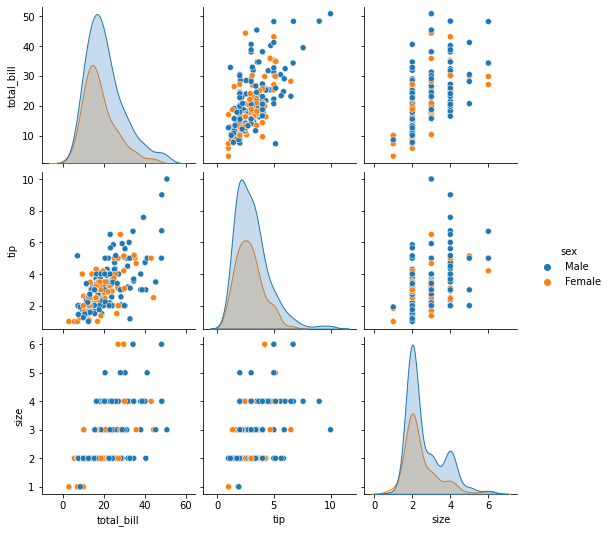

In [16]:
sns.pairplot(tips, hue='sex')

<AxesSubplot:xlabel='total_bill'>

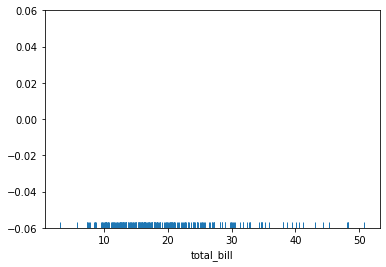

In [17]:
sns.rugplot(tips['total_bill'])

/home/tn/pyvenv/DataScienceMLBootcamp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

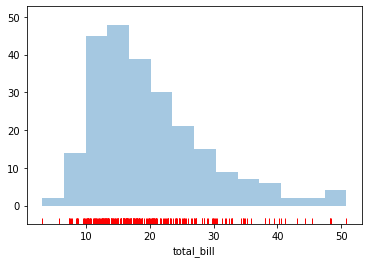

In [18]:
sns.rugplot(tips['total_bill'], color='r')
sns.distplot(tips['total_bill'], kde=False)

/home/tn/pyvenv/DataScienceMLBootcamp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

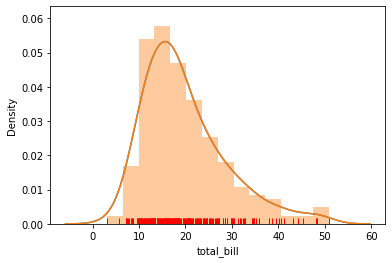

In [22]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])
sns.distplot(tips['total_bill'])

/home/tn/pyvenv/DataScienceMLBootcamp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

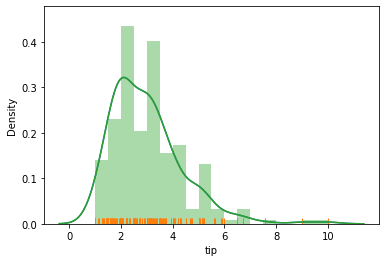

In [23]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])
sns.distplot(tips['tip'])

(0.0, 1.0)

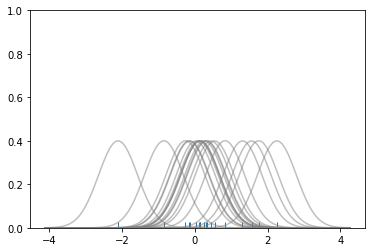

In [24]:
# Step 1: Importing couple of libraries to use 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Creating dataset to use
dataset = np.random.randn(20)

# Creating rugplot using dataset
sns.rugplot(dataset);

# Setting up the x-axis for the plot using max and min values in the dataset
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# creating 100 equally spaced points from x_min to x_max using np.linspace()
x_axis = np.linspace(x_min,x_max,100)

# Setting up the bandwidth, follow the wikipedia link for more information:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Creating an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis) #shift+tab if you want to know more about the function! 
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)